### Fitting Logistic Regression

In this first notebook, you will be fitting a logistic regression model to a dataset where we would like to predict if a transaction is fraud or not.

To get started let's read in the libraries and take a quick look at the dataset.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
def pv(variable):
    if(len(variable)>1): print(variable, ":", eval(variable))

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


df = pd.read_csv('./fraud_dataset.csv')
df.head()

,transaction_id,duration,day,fraud
0,28891,21.302600,weekend,False
1,61629,22.932765,weekend,False
2,53707,32.694992,weekday,False
3,47812,32.784252,weekend,False
4,43455,17.756828,weekend,False


In [3]:
np.where(df["day"].str.contains("weekday"), 1, 0)

array([0, 0, 1, ..., 1, 1, 0])

`1.` As you can see, there are two columns that need to be changed to dummy variables.  Replace each of the current columns to the dummy version.  Use the 1 for `weekday` and `True`, and 0 otherwise.  Use the first quiz to answer a few questions about the dataset.

In [4]:
# df_new = df.join(pd.get_dummies(df['day']))
# df_new = df_new.join(pd.get_dummies(df['fraud']))

df["weekday"] = np.where(df["day"].str.contains("weekday"), 1, 0)
df["fraudulent"] = np.where( df["fraud"], 1, 0 )
df.tail(2)
pv("df['fraudulent'].mean()")
pv('df.query("fraudulent == 1").duration.mean()')
pv("df['weekday'].mean()")
pv('df.query("fraudulent == 0").duration.mean()')
pv('df.query("weekday == 1").fraudulent.mean()')
pv('df.query("weekday == 0").fraudulent.mean()')

,transaction_id,duration,day,fraud,weekday,fraudulent
8791,63507,35.631321,weekday,False,1,0
8792,74587,36.356404,weekend,False,0,0


df['fraudulent'].mean() : 0.012168770612987604
df.query("fraudulent == 1").duration.mean() : 4.624247370615658
df['weekday'].mean() : 0.3452746502900034
df.query("fraudulent == 0").duration.mean() : 30.013583132522584
df.query("weekday == 1").fraudulent.mean() : 0.026021080368906456
df.query("weekday == 0").fraudulent.mean() : 0.004863644259162758


`2.` Now that you have dummy variables, fit a logistic regression model to predict if a transaction is fraud using both day and duration.  Don't forget an intercept!  Use the second quiz below to assure you fit the model correctly.

In [5]:
df['intercept'] = 1
mod = sm.Logit(df['fraudulent'], df[['intercept', 'duration', 'weekday']])
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.002411
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             fraudulent   No. Observations:                 8793
Model:                          Logit   Df Residuals:                     8790
Method:                           MLE   Df Model:                            2
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:                  0.9633
Time:                        13:12:53   Log-Likelihood:                -21.200
converged:                       True   LL-Null:                       -578.10
                                        LLR p-value:                1.390e-242
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.8709      1.944      5.078      0.000       6.061      13.681
duration      -1.4637      0.290     -5.039      0.000      -2.033      -0.894
weekday        2.5465      0.904      2.816      0.005       0.774       4.319
==============================================================================

Possibly complete quasi-separation: A fraction 0.98 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [6]:
pv("np.exp(-1.4637)")
pv("np.exp(2.5465)")

np.exp(-1.4637) : 0.2313785882117941
np.exp(2.5465) : 12.762357271496972


In [7]:
1/np.exp(-1.4637)

4.321921089278333

### Interpreting Results of Logistic Regression

In this notebook (and quizzes), you will be getting some practice with interpreting the coefficients in logistic regression.  Using what you saw in the previous video should be helpful in assisting with this notebook.

The dataset contains four variables: `admit`, `gre`, `gpa`, and `prestige`:

* `admit` is a binary variable. It indicates whether or not a candidate was admitted into UCLA (admit = 1) our not (admit = 0).
* `gre` is the GRE score. GRE stands for Graduate Record Examination.
* `gpa` stands for Grade Point Average.
* `prestige` is the prestige of an applicant alta mater (the school attended before applying), with 1 being the highest (highest prestige) and 4 as the lowest (not prestigious).

To start, let's read in the necessary libraries and data.

In [8]:
df = pd.read_csv("./admissions.csv")
df.head(2)

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3


There are a few different ways you might choose to work with the `prestige` column in this dataset.  For this dataset, we will want to allow for the change from prestige 1 to prestige 2 to allow a different acceptance rate than changing from prestige 3 to prestige 4.

1. With the above idea in place, create the dummy variables needed to change prestige to a categorical variable, rather than quantitative, then answer quiz 1 below.

In [9]:
df["prestige_3_4"] = np.where(df["prestige"] > 2, 1, 0)
df["prestige_3_4"] = np.where(df["prestige"] > 2, 1, 0)
df = df.join(pd.get_dummies(df['prestige']))
df.head(3)

,admit,gre,gpa,prestige,prestige_3_4,1,2,3,4
0,0,380,3.61,3,1,0,0,1,0
1,1,660,3.67,3,1,0,0,1,0
2,1,800,4.00,1,0,1,0,0,0


In [10]:
df["prestige"].value_counts()

2    148
3    121
4     67
1     61
Name: prestige, dtype: int64

`2.` Now, fit a logistic regression model to predict if an individual is admitted using `gre`, `gpa`, and `prestige` with a baseline of the prestige value of `1`.  Use the results to answer quiz 2 and 3 below.  Don't forget an intercept.

In [11]:
df['intercept'] = 1
mod = sm.Logit(df['admit'], df[['intercept', 'gre', 'gpa', 2, 3, 4]])
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Apr 2019   Pseudo R-squ.:                 0.08166
Time:                        13:12:53   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.8769      1.142     -3.393      0.001      -6.116      -1.638
gre            0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa            0.7793      0.333      2.344      0.019       0.128       1.431
2             -0.6801      0.317     -2.146      0.032      -1.301      -0.059
3             -1.3387      0.345     -3.882      0.000      -2.015      -0.663
4             -1.5534      0.417     -3.721      0.000      -2.372      -0.735
==============================================================================
"""

In [12]:
print('GPA')
pv("np.exp(0.779)")
print("2")
pv("np.exp(-0.68)")
pv("1/np.exp(-0.68)")
print("3")
pv("np.exp(-1.3387)")
pv("1/np.exp(-1.33387)")
print("4")
pv("np.exp(-1.553)")
pv("1/np.exp(-1.553)")
print("If an individual attended the most prestigious alma mater, they are __ more likely to be admitted than if they attended the second lowest in prestigious-ness, holding all other variables constant.")
pv("(1/np.exp(-1.553)) - (1/np.exp(-0.68))")
print("If an individual attended the most prestigious alma mater, they are __ more likely to be admitted than if they attended the second most prestigious, holding all other variables constant.")
pv("(1/np.exp(-1.553)) / np.exp(1.3387)")

np.exp(res.params)
1/_
df.groupby('prestige').mean()['admit']

GPA
np.exp(0.779) : 2.179291883605348
2
np.exp(-0.68) : 0.5066169923655895
1/np.exp(-0.68) : 1.973877732230448
3
np.exp(-1.3387) : 0.26218628930498067
1/np.exp(-1.33387) : 3.795704376193652
4
np.exp(-1.553) : 0.2116121840667451
1/np.exp(-1.553) : 4.725625815971862
If an individual attended the most prestigious alma mater, they are __ more likely to be admitted than if they attended the second lowest in prestigious-ness, holding all other variables constant.
(1/np.exp(-1.553)) - (1/np.exp(-0.68)) : 2.751748083741414
If an individual attended the most prestigious alma mater, they are __ more likely to be admitted than if they attended the second most prestigious, holding all other variables constant.
(1/np.exp(-1.553)) / np.exp(1.3387) : 1.238994297333484


intercept    0.020716
gre          1.002221
gpa          2.180027
2            0.506548
3            0.262192
4            0.211525
dtype: float64

intercept    48.272116
gre           0.997784
gpa           0.458710
2             1.974147
3             3.813995
4             4.727566
dtype: float64

prestige
1    0.540984
2    0.358108
3    0.231405
4    0.179104
Name: admit, dtype: float64

**That's right! Notice that in order to compare the lower prestigious values to the most prestigious (the baseline), we took one over the exponential of the coefficients. However, for a 1 unit increase, we could use the exponential directly.**

### Model Diagnostics in Python

In this notebook, you will be trying out some of the model diagnostics you saw from Sebastian, but in your case there will only be two cases - either admitted or not admitted.

First let's read in the necessary libraries and the dataset.

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)



`1.` Change prestige to dummy variable columns that are added to `df`.  Then divide your data into training and test data.  Create your test set as 20% of the data, and use a random state of 0.  Your response should be the `admit` column.  [Here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) are the docs, which can also find with a quick google search if you get stuck.

In [14]:
df = pd.read_csv('./admissions.csv')
df.head()
df = df.join(pd.get_dummies(df['prestige'], prefix='prestige'))
df.head()
X = df[['gre', 'gpa', 'prestige_1', 'prestige_2', 'prestige_3']]
y = df[['admit']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


,admit,gre,gpa,prestige,prestige_1,prestige_2,prestige_3,prestige_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


`2.` Now use [sklearn's Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to fit a logistic model using `gre`, `gpa`, and 3 of your `prestige` dummy variables.  For now, fit the logistic regression model without changing any of the hyperparameters.  

The usual steps are:
* Instantiate
* Fit (on train)
* Predict (on test)
* Score (compare predict to test)

As a first score, obtain the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).  Then answer the first question below about how well your model performed on the test data.

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

`3.` Now, try out a few additional metrics: [precision](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [recall](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), and [accuracy](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) are all popular metrics, which you saw with Sebastian.  You could compute these directly from the confusion matrix, but you can also use these built in functions in sklearn.

Another very popular set of metrics are [ROC curves and AUC](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py).  These actually use the probability from the logistic regression models, and not just the label.  [This](http://blog.yhat.com/posts/roc-curves.html) is also a great resource for understanding ROC curves and AUC.

Try out these metrics to answer the second quiz question below.  I also provided the ROC plot below.  The ideal case is for this to shoot all the way to the upper left hand corner.  Again, these are discussed in more detail in the Machine Learning Udacity program.

In [39]:

# confusion_matrix, precision_score, recall_score, accuracy_score
pv("precision_score(y_test, y_pred)")
pv("recall_score(y_test, y_pred)")
pv("accuracy_score(y_test, y_pred)")

# tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()

def compute_stats(y_test, y_pred, classes):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    print("TN", tn)
    print("FP", fp)
    print("FN", fn)
    print("TP", tp)
    #plot_confusion_matrix(y_test, y_pred, classes)
    # precission = TP / (TP + FP)
    precision = tp/(tp + fp);
    print("Precision : ", precision)
    # recall =  = TP / (TP + FN)
    recall = tp / (tp+fn);
    print("Recall : ", recall)
    F1 = 2 * ((precision*recall)/(precision + recall))
    print("F1 : ", F1)
    F2 = 5 * ((precision*recall)/(4*precision + recall))
    print("F2 : ", F2)

    
compute_stats(y_test, y_pred, ["Admit", "Refused"])


cm = confusion_matrix(y_test, y_pred)

# FP = cm.sum(axis=0) - np.diag(cm)
# FN = cm.sum(axis=1) - np.diag(cm)
# TP = np.diag(cm)
# TN = cm.sum() - (FP + FN + TP)
TN, FP, FN, TP = cm.ravel()
pv("FP")
pv("FN")
pv("TP")
pv("TN")


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
pv("TPR")
pv("TNR")
pv("PPV")
pv("NPV")
pv("FPR")
pv("FNR")
pv("FDR")


precision_score(y_test, y_pred) : 1.0
recall_score(y_test, y_pred) : 0.08333333333333333
accuracy_score(y_test, y_pred) : 0.725
[[56  0]
 [22  2]]
TN 56
FP 0
FN 22
TP 2
Precision :  1.0
Recall :  0.08333333333333333
F1 :  0.15384615384615385
F2 :  0.10204081632653061
FP : 0
FN : 22
TP : 2
TN : 56
TPR : 0.08333333333333333
TNR : 1.0
PPV : 1.0
NPV : 0.717948717948718
FPR : 0.0
FNR : 0.9166666666666666
FDR : 0.0


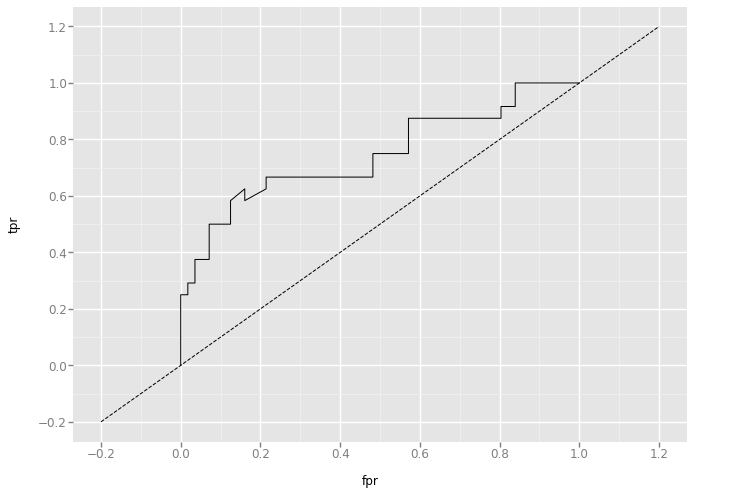

<ggplot: (-9223363285485891079)>

In [18]:
### Unless you install the ggplot library in the workspace, you will 
### get an error when running this code!
#!pip uninstall ggplot
from ggplot import *
from sklearn.metrics import roc_curve, auc
%matplotlib inline

preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

**If we really care about correctly identifying the accepted students as accepted, which metric do we care about the most? => We want the FN to be as low as possible, so we want to maximize RECALL (near 1 as possible)** 